In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [4]:
diabetes = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

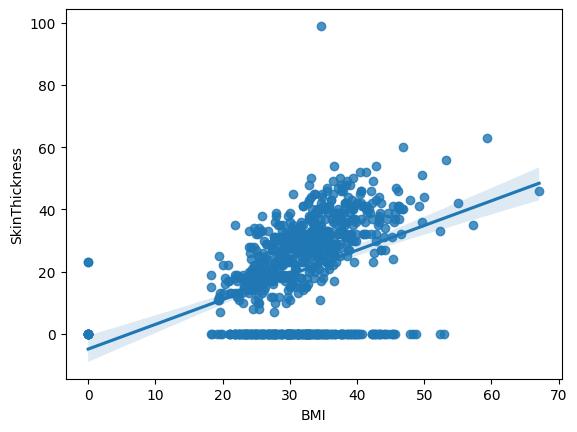

In [8]:
sns.regplot(x='BMI', y='SkinThickness', data =diabetes)
plt.show()

In [11]:
pearson_coef,p_value = stats.pearsonr(diabetes['BMI'], diabetes['SkinThickness'])
print(pearson_coef)


0.3925732041590383


In [12]:
print(p_value)

1.0548761717292765e-29


In [13]:
diabetes[['BMI', 'SkinThickness']].head()

,BMI,SkinThickness
0,33.6,35
1,26.6,29
2,23.3,0
3,28.1,23
4,43.1,35


In [26]:
w = 1.2
b = 0
y = w*x+b

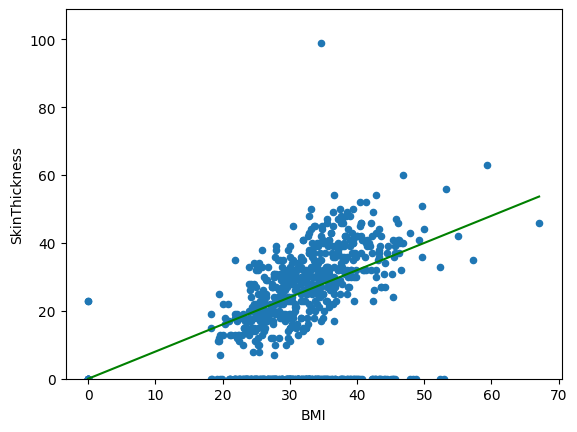

In [25]:
diabetes.plot.scatter(x = 'BMI',y = 'SkinThickness')

x = np.linspace(0, diabetes['BMI'].max(), 100)
plt.plot(x,y,'-g')
plt.ylim(0,diabetes['SkinThickness'].max()*1.1)
plt.show()

In [27]:
diabetes['pred'] = diabetes['BMI']*b*w

In [28]:
diabetes['diff'] = diabetes['pred']-diabetes['SkinThickness']
diabetes['cuad'] = diabetes['diff']**2
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,diff,cuad
0,6,148,72,35,0,33.6,0.627,50,1,0.0,-35.0,1225.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0,-29.0,841.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0,0.0,0.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0,-23.0,529.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0,-35.0,1225.0


In [29]:
diabetes['cuad'].mean()

675.8880208333334

In [30]:
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns = ['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [31]:
def sum_error(w, diabetes):
    b = 0
    diabetes['pred']= diabetes['BMI']*w+b
    diabetes['diff']= diabetes['pred']-diabetes['SkinThickness']
    diabetes['cuad']= diabetes['diff']**2
    return(diabetes['cuad'].mean())

In [32]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, diabetes=diabetes))
grid_error.head()

,w,error
0,50.000000,2.644054e+06
1,53.061224,2.982230e+06
2,56.122449,3.340754e+06
3,59.183673,3.719624e+06
4,62.244898,4.118840e+06


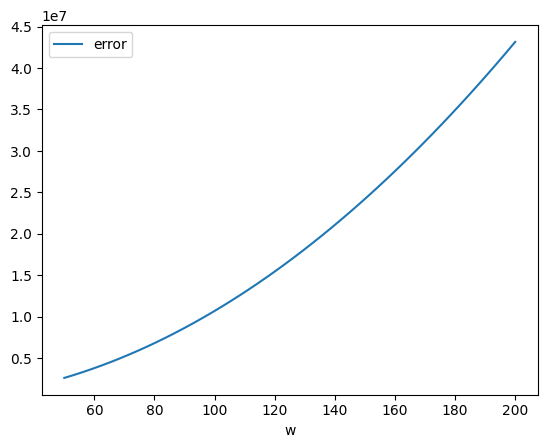

In [33]:
grid_error.plot(x='w', y='error')
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression


In [38]:
x = np.array(diabetes['BMI']).reshape((-1,1))
y = np.array(diabetes['SkinThickness'])

In [40]:
model = LinearRegression(fit_intercept = False)
model.fit(x,y)
print(f'intercepto(b): {model.intercept_}')
print(f'pendiente (w): {model.coef_}')

intercepto(b): 0.0
pendiente (w): [0.65062745]


In [42]:
w = 0.6506
b = 0
y = w*x+b



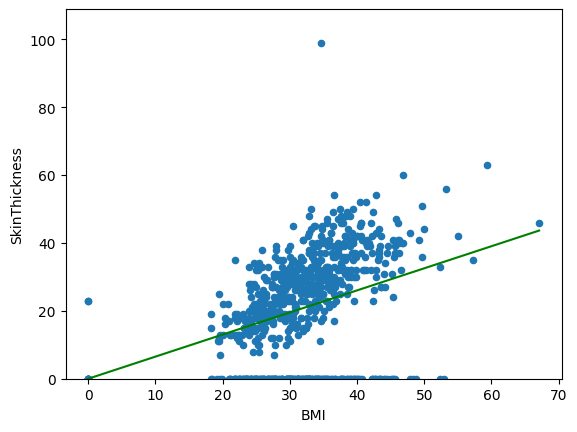

In [43]:
diabetes.plot.scatter(x = 'BMI',y = 'SkinThickness')

x = np.linspace(0, diabetes['BMI'].max(), 100)
plt.plot(x,y,'-g')
plt.ylim(0,diabetes['SkinThickness'].max()*1.1)
plt.show()